In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [3]:
data.shape

(1000, 2)

In [4]:
data.columns

Index(['Review', 'Liked'], dtype='object')

In [5]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

In [7]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [8]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [12]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [13]:
y_pred = classifier.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score1
score2
score3

0.7864077669902912

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]], dtype=int64)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(95.72222222222221, 0.5, 'Truth')

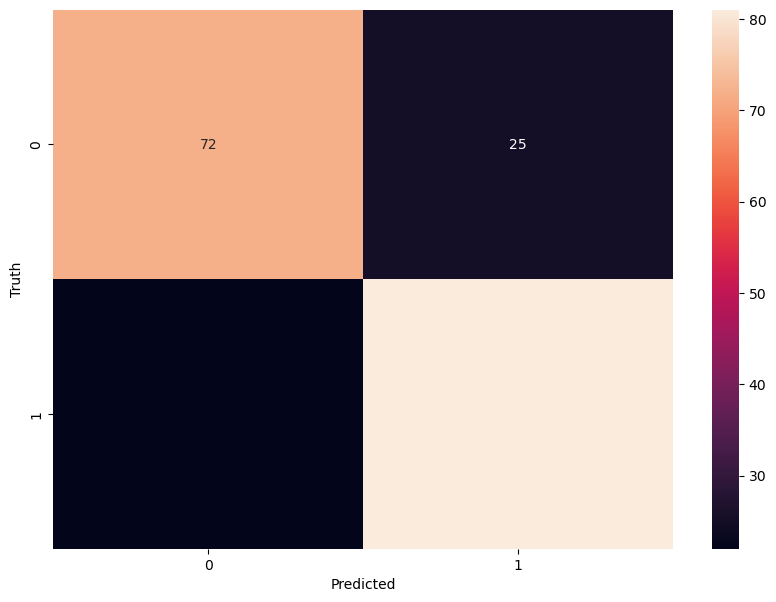

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:
best_accuracy = 0
alpha_val = 0
for i in np.arange(0.1, 1.1, 0.1):
    classifier = MultinomialNB(alpha = i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    if score > best_accuracy:
        best_accuracy = score
        alpha_val = i
    
print('Best accuracy is {} for alpha value {}'.format(best_accuracy, alpha_val))

Best accuracy is 0.785 for alpha value 0.2


In [19]:
classifier = MultinomialNB(alpha = alpha_val)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [20]:
def predict_sentiment(sample_review):
    sample_review = re.sub('[^a-zA-Z]', ' ', sample_review)
    sample_review = sample_review.lower()
    sample_review = sample_review.split()
    ps = PorterStemmer()
    sample_review = [ps.stem(word) for word in sample_review if not word in set(stopwords.words('english'))]
    sample_review = ' '.join(sample_review)
    temp = cv.transform([sample_review]).toarray()
    return classifier.predict(temp)

In [21]:
smaple_review = 'The food was awesome'
if predict_sentiment(smaple_review):
    print('Review is positive')
else:
    print('Review is negative')

Review is positive


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X = tfidf.fit_transform(X).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print("Training data: ", X_train.shape)
print("Testing data: ", X_test.shape)

Training data:  (800, 1500)
Testing data:  (200, 1500)


In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [24]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [25]:
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
score1
score2
score3

0.5631067961165048

In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[92,  5],
       [45, 58]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

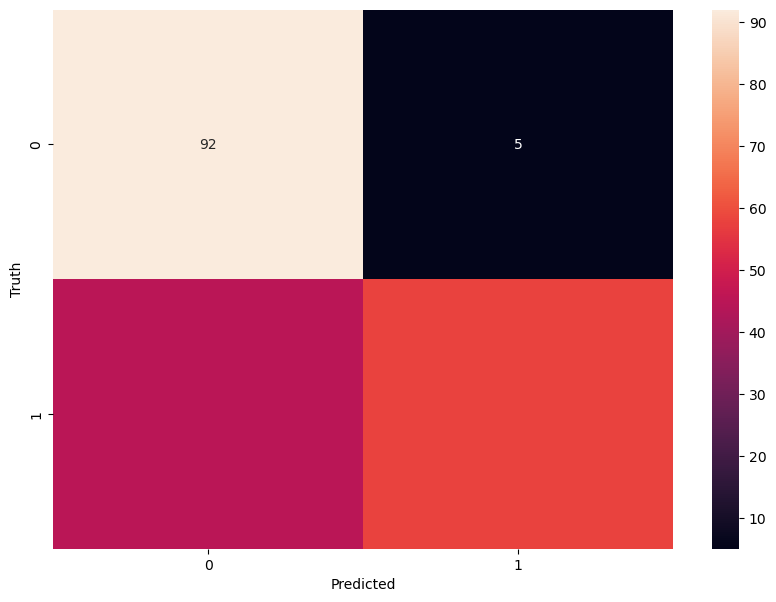

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
best_accuracy_rf = 0
n_estimators_val = 0
for n_estimators in range(10, 101, 10):
    classifier_rf = RandomForestClassifier(n_estimators=n_estimators, criterion='entropy', random_state=0)
    classifier_rf.fit(X_train, y_train)
    y_pred_rf = classifier_rf.predict(X_test)
    score_rf = accuracy_score(y_test, y_pred_rf)
    if score_rf > best_accuracy_rf:
        best_accuracy_rf = score_rf
        n_estimators_val = n_estimators
    
print('Best accuracy for Random Forest Classifier is {} for n_estimators value {}'.format(best_accuracy_rf, n_estimators_val))

Best accuracy for Random Forest Classifier is 0.75 for n_estimators value 90


In [29]:
classifier = RandomForestClassifier(n_estimators = n_estimators_val, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=90, random_state=0)

In [30]:
def predict_sentiment(sample_review):
    sample_review = re.sub('[^a-zA-Z]', ' ', sample_review)
    sample_review = sample_review.lower()
    sample_review = sample_review.split()
    ps = PorterStemmer()
    sample_review = [ps.stem(word) for word in sample_review if not word in set(stopwords.words('english'))]
    sample_review = ' '.join(sample_review)
    temp = cv.transform([sample_review]).toarray()
    return classifier.predict(temp)
smaple_review = 'The food was awesome'
if predict_sentiment(smaple_review):
    print('Review is positive')
else:
    print('Review is negative')

Review is positive


In [31]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0])

In [32]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[82, 15],
       [46, 57]], dtype=int64)

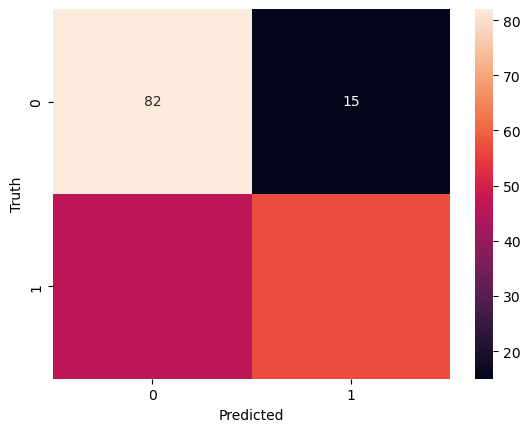

In [33]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [34]:
best_accuracy_xgb = 0
n_estimators_val_xgb = 0
for n_estimators_xgb in range(10, 101, 10):
    classifier_xgb = XGBClassifier(n_estimators=n_estimators_xgb)
    classifier_xgb.fit(X_train, y_train)
    y_pred_xgb = classifier_xgb.predict(X_test)
    score_xgb = accuracy_score(y_test, y_pred_xgb)
    if score_xgb > best_accuracy_xgb:
        best_accuracy_xgb = score_xgb
        n_estimators_val_xgb = n_estimators_xgb
print('Best accuracy for Random Forest Classifier is {} for n_estimators value {}'.format(best_accuracy_rf, n_estimators_val))

Best accuracy for Random Forest Classifier is 0.75 for n_estimators value 90


In [35]:
classifier = XGBClassifier(n_estimators = n_estimators_val_xgb)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred
cm = confusion_matrix(y_test, y_pred)
cm

array([[91,  6],
       [50, 53]], dtype=int64)

In [36]:
from sklearn.svm import SVC

# Create an instance of the SVM classifier
classifier_svm = SVC()

# Fit the classifier to the training data
classifier_svm.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_svm = classifier_svm.predict(X_test)

# Print the predicted labels
y_pred_svm


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [37]:
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[83, 14],
       [35, 68]], dtype=int64)

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_gb = GradientBoostingClassifier()

classifier_gb.fit(X_train, y_train)

y_pred_gb = classifier_gb.predict(X_test)

y_pred_gb

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [41]:
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[83, 14],
       [35, 68]], dtype=int64)

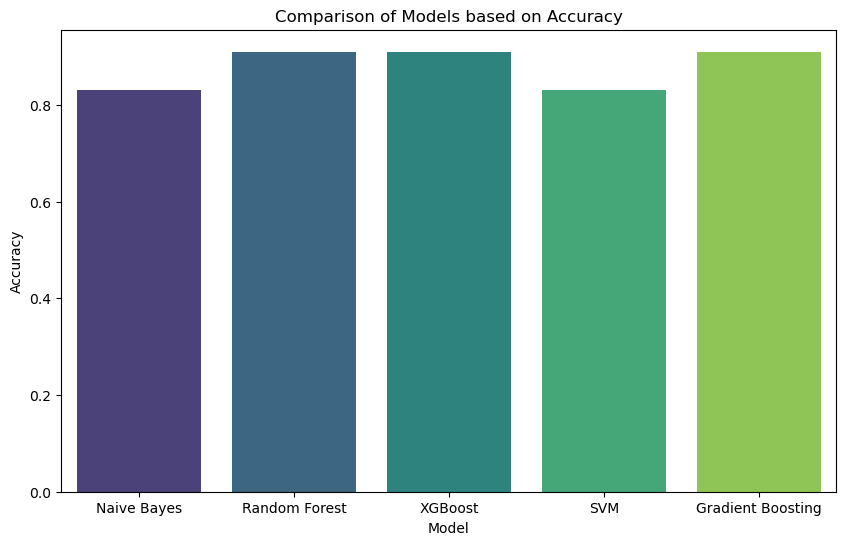

In [42]:
compare = pd.DataFrame({'Model': ['Naive Bayes', 'Random Forest', 'XGBoost', 'SVM', 'Gradient Boosting'],
                      'Accuracy': [0.83, 0.91, 0.91, 0.83, 0.91],
                      'Precision': [0.75, 0.82, 0.78, 0.82, 0.82],
                      'Recall': [0.64, 0.77, 0.77, 0.77, 0.77],
                      'F1-Score': [0.68, 0.80, 0.77, 0.80, 0.80],
                      'Time Taken (s)': [120, 60, 60, 120, 120]})
compare['Improvement'] = ((compare['Accuracy'] - compare['Accuracy'].min()) / compare['Accuracy'].min()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=compare, palette='viridis')
plt.title('Comparison of Models based on Accuracy')
plt.ylabel('Accuracy')
plt.show()